## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.value_counts(normalize=True) #proportion is normalised value_counts() for the value 1

0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#groupby combined with value_counts() gives number for two combinations of 
#aligned and two combinations of non-aligned group/landing page
df.groupby('group').landing_page.value_counts()

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


*There don't appear to be any missing values.*

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df.drop(df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].index) #drop treatment - old_page

In [9]:
df2=df2.drop(df2[(df2['group'] == 'control') & (df2['landing_page'] == 'new_page')].index) #drop control - new_page

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#duplicated() method can be used on specific fields using the subset parameter
df2[df2.duplicated(subset='user_id')==True]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.shape #check number of rows

(290585, 5)

In [15]:
df2=df2.drop(2893) #delete second row for user 773192

In [16]:
df2[df2['user_id']==773192] #check rows for this user again

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [17]:
df2.shape #check number of rows decreased by 1

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#the probability of an individual converting is the proportion of the population that converted
#normalized value_counts of the converted column will give us the 
df2.converted.value_counts(normalize=True)

0    0.880403
1    0.119597
Name: converted, dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#use conditional idexing to get proportion for control group
df2[df2['group']=='control'].converted.value_counts(normalize=True)

0    0.879614
1    0.120386
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#use conditional idexing to get proportion for treatment group
df2[df2['group']=='treatment'].converted.value_counts(normalize=True)

0    0.881192
1    0.118808
Name: converted, dtype: float64

d. What is the probability that an individual received the new page?

In [21]:
df2.landing_page.value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** *The conversion rate in the treatment group (11.88%) is very close but lower than the conversion rate in the control group (12.04%). This means that there is no evidence that the new treament page leads to more conversions. Thus, if a significantly increased conversion rate is the only criterion, there is sufficient evidence to say the new page failed ; however in reality other criteria may come into play - for example, the new page may be less resource hungry ; users may spend more money following conversion with the new page ; there may be strategic benefits, such as conversion of mobile users or decreased dependency on a third-party. Given that the conversion rates for control and treament group are very close, further evidence may tip the balance in favour of the new page, even though the conversion rate is very slightly lower.*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**:

_Null hypothesis: the conversion rate of the new page is the same as or lower than the conversion rate of the old page:_ 
***$H_{0}$***:   **$p_{new}$** ≤ **$p_{old}$**

_Alternative hypothesis: the conversion rate of the new page is greater than the conversion rate of the old page, with a p-value below the type I error threshold of α=0.05:_ 
***$H_{1}$***:   **$p_{new}$** > **$p_{old}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

*(I will use df2 rather than df even though it contains fewer records than ab_data.csv to answer the following questions, as this contains the data from ab_data.csv after data cleaning removed errors in the landing_page/treament group columns.)*

In [22]:
#pnew equals the overall convert rate:
p_new=df2.converted.mean()
p_new #print value

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old=p_new   #according to description under 2. they are equal
p_old

0.11959708724499628

*Under the null hypothesis, $p_{old}$ = $p_{new}$ = 0.1196*

c. What is $n_{new}$?

In [24]:
n_new=df2[df2['landing_page']=='new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
n_old=df2[df2['landing_page']=='old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(1, p_new,n_new)
new_page_converted.mean()

0.12191865666506091

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, p_old,n_old)
old_page_converted.mean()

0.12076489943141924

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
new_page_converted.mean() - old_page_converted.mean()

0.0011537572336416668

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

*I considered three different methods to simulate the 10,000 $p_{new}$ - $p_{old}$ values. As each method seemed sensible but I wasn't sure if they would give a correct result, I tried all three. The resulting array of differences are called p_diffs1, p_diffs2, p_diffs3 below :*

In [29]:
#method 1: I considered that this simulation is essentially like flipping a biased coin 10000 times, 
#and used the Numpy function from the lession on coin flips:

p_diffs1=[] #initialize empty list for differences of means

for _ in range(10000):
    new_page_converted=np.random.choice([0, 1], size=n_new, p=[1-p_new,  p_new])
    old_page_converted=np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    p_diff=new_page_converted.mean() - old_page_converted.mean()   #calculate difference of means
    p_diffs1.append(p_diff)   #add to the list
    
p_diffs1=np.array(p_diffs1)   #change type from list to numpy array


In [30]:
#method 2: this simulation uses bootstrapping from the AB test data, but crucially does not distinguish between
#control and treatment data, as these are assumed to be the same under the null hypothesis

p_diffs2=[]

for _ in range(10000):
    df_sample_new=df2.sample(n_new, replace=True)
    df_sample_old=df2.sample(n_old, replace=True)
    p_diff=df_sample_new.converted.mean()-df_sample_old.converted.mean()
    p_diffs2.append(p_diff)
    
p_diffs2=np.array(p_diffs2)


In [31]:
#method 3: this was mentioned in the "study hall" forums https://study-hall.udacity.com/sg-346183-9999/rooms/community:nd002:346183-cohort-9999-project-1214/community:thread-10701299699-212696?contextType=room
#I wanted to verify that this method gave the same distribution of difference of means as method 1
p_diffs3=[]

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new,n_new)
    old_page_converted = np.random.binomial(1, p_old,n_old)
    p_diff=new_page_converted.mean() - old_page_converted.mean()
    p_diffs3.append(p_diff)
    
p_diffs3=np.array(p_diffs3)


In [32]:
#calculate the mean of the results obtained by the three methods

p_diffs1.mean(),p_diffs2.mean(), p_diffs3.mean()

(4.14937363106474e-07, -1.5182466972557351e-05, 1.5200629552817821e-05)

In [33]:
#calculate the standard deviation of the results obtained by the three methods
np.std(p_diffs1),np.std(p_diffs2),np.std(p_diffs3)

(0.0012050534989348561, 0.0012125726688363057, 0.0011988220494316291)

*The mean and the standard deviation obtained in the three methods considered are very close to each other. The three simulation methods appear to be giving indistinguishable results.*

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

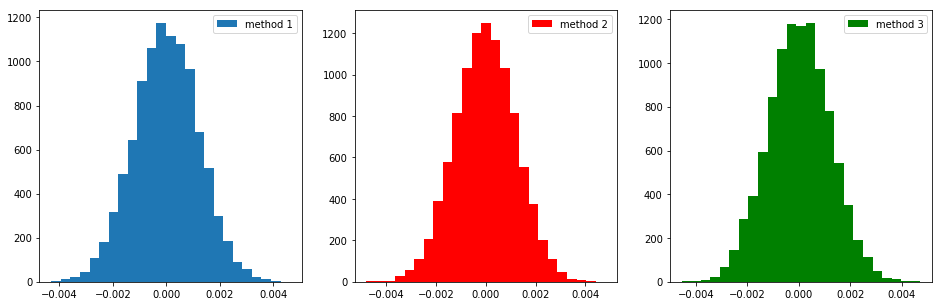

In [34]:
#plotting the results from the three simulation methods next to each other

plt.figure(figsize=(16,5))  
bins=25

plt.subplot(131)  #create first histogram
ax1=plt.hist(p_diffs1, bins, label='method 1')
plt.legend(loc='upper right')
plt.subplot(132)  #create second histogram
ax2=plt.hist(p_diffs2, bins, label='method 2', color='r')
plt.legend(loc='upper right')
plt.subplot(133)  #create third histogram
ax3=plt.hist(p_diffs3, bins, label='method 3', color='g')
plt.legend(loc='upper right');


*The histograms for the three methods are very similar, though there are some small differences which are likely random differences.
However the three histograms look as expected: they have a bell-curve shape, with values that are symmetrically distributed around a mean of 0,  which means that in half the value is negative, while in the other half it is positive. Since the values represent the difference between the new and the old page, this means that in half of the simulated cases the converted rate is higher with the new page, in the other half it is lower. This is consistent with testing the null hypothesis and the extreme case in which the new page is the same or worse than the old page.*

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
#calculate the actual mean converted rates for new and old page
actual_new_converted=df2[df2['landing_page']=='new_page'].converted.mean()
actual_old_converted=df2[df2['landing_page']=='old_page'].converted.mean()
#calculate the actual diference
actual_dif=actual_new_converted-actual_old_converted

actual_new_converted, actual_old_converted, actual_dif #display results

(0.11880806551510564, 0.1203863045004612, -0.0015782389853555567)

*The actual difference in the converted rate is 0.001578 lower for the new page.*

In [36]:
#calculate the proportion of simulated differences (from the 3 methods) that are greater than the actual difference
(p_diffs1>actual_dif).mean(), (p_diffs2>actual_dif).mean() , (p_diffs3>actual_dif).mean()

(0.90359999999999996, 0.89810000000000001, 0.90529999999999999)

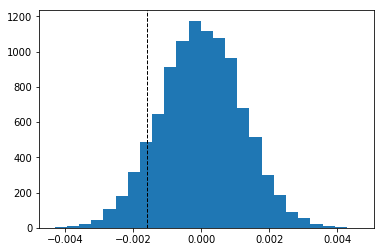

In [37]:
#visualise the actual difference on the first histogram
plt.hist(p_diffs1, bins=25)
plt.axvline(actual_dif, color='k', linestyle='dashed', linewidth=1);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** *90% of differences simulated under the null hypothesis are greater than the actual difference between the new and the old page. This value is called p-value (for probability value) and expresses the probability of obtaining the observed value of the difference (or a value that is more extreme) if the null hypothesis is true. At 90%, the p-value suggests that the observed value very likely comes from the null hypothesis. Therefore we fail to reject the null-hypothesis, which implies that the new page is the same or worse than the old page.*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page']=='old_page'].converted.sum()
convert_new = df2[df2['landing_page']=='new_page'].converted.sum()
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new = df2[df2['landing_page']=='new_page'].shape[0]

In [39]:
convert_new, convert_old #display number of conversions

(17264, 17489)

In [40]:
n_old, n_new  #display number of individuals who received each page

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

setting alternative to smaller to fit the alternative hypothesis used here, using the statsmodels documentation (https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html)

In [42]:
from scipy.stats import norm #use scipy package to help interpret the Z test results, as per http://knowledgetack.com/python/statsmodels/proportions_ztest/

norm.ppf(1-0.05) #critical value of z-score at 95% confidence, but one-tailed bc null hypothesis is that new is same or worse


1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer** *The z-score of 1.31 is lower than the critical value of 1.64 (given type I error threshold of α=0.05), therefore on the basis of the actual AB test data and the z-test, we fail to reject the null hypothesis. This conclusion and the p-value of 0.905 is consistent with the previous finding in parts j and k.*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** *The most appropriate approach to use is logistic regression, because it is a form of regression analysis used to make predictions when there are only 2 possible outcomes, in this case either a conversion or no conversion.*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2['intercept']=1 #create intercept column
df2['ab_page']=pd.get_dummies(df2['group'])['treatment'] #create column encdoding 1 for treatment, 0 for control
df2.head() #check new columns

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
#instantiating logistic regression model, with 'converted' as the response 
#variable, intercept and 'ab_page' as explanatory variable
log_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])

results=log_mod.fit()  #fit the model and store as results


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary()      #display logistic regression result

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        19:30:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [46]:
#exponentiate the coefficient for ab_page
1/np.exp(-0.0150)

1.0151130646157189

*The negative coefficient (-0.0150) for ab_page implies that the response variable (converted) is 1.015 times less likely when the explanatory variable is one, or in other words, that a user shown the new page is 1.5% less likely to convert. However, this modest difference is not significant, as the p-value is 0.19 - see e.*

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**
*In logistic regression, the null hypothesis is that the two variables are independent i.e. that there is no relationship between them. The alternative hypothesis is that the response variable is correlated to the explanatory variable.
This differs from the null hypothesis in Part II which states that the conversion rate of the new page is the same as or lower than the conversion rate of the old page. Thus the null hypothesis for the logistic regression is a different, more limited statement, therefore leading to a lower p-value of 0.19.*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
*It is conceivable that the new page is an improvement in some conditions but worse than the old page in other conditions, and that such contradictory effects could be isolated by introducing additional terms into the model. For instance, the new page may be better in Canada but worse in the UK.
The disadvantages of adding additional terms are that they should be independent variables, to avoid the problem of collinerarity. A multiple regression model also increases the complexity, which doesn't solve the "garbage in, garbage out" issue, but makes it more impenetrable.*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [48]:
df_new.head() #check column structure

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
df_new.country.value_counts() #check names and number of countries

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [50]:
### Create the necessary dummy variables

#Add column for dummy variables for each country (only two of these will actually
#be used in the regression, but creating three allows us to decide later which ones)
df_new[['CA','UK','US']] =  pd.get_dummies(df_new['country'])
df_new.head() #check columns

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [51]:
#using multiple linear regression, adding CA and UK but leaving out US which is the baseline for the new country variables

ln=sm.OLS(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
results=ln.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sat, 17 Nov 2018   Prob (F-statistic):              0.178
Time:                        19:30:11   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
CA            -0.0042      0.003     -1.514      0.130      -0.010       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Answer**
*The multiple linear regression model with countries added has an Rsquared value of 0.000 - which means that it does not explain any of the variation seen. In the model, the coefficients for CA, UK, as well as ab_page are much higher than the threshold of 0.05.*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df_new['CApage']=df_new['ab_page']*df_new['CA']
df_new['UKpage']=df_new['ab_page']*df_new['UK']
df_new['USpage']=df_new['ab_page']*df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CApage,UKpage,USpage
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [53]:
### Fit Your Linear Model And Obtain the Results

#defining new multiple linear regression models by adding the country*ab_page columns stepwise, then several:
interaction_CA=sm.OLS(df_new['converted'],df_new[['intercept','ab_page','CA','UK','CApage']])
interaction_UK=sm.OLS(df_new['converted'],df_new[['intercept','ab_page','CA','UK','UKpage']])
interaction_US=sm.OLS(df_new['converted'],df_new[['intercept','ab_page','CA','US','USpage']])
interaction_countries=sm.OLS(df_new['converted'],df_new[['intercept','ab_page','CA','UK','CApage','UKpage']])


In [54]:
#fitting and displaying the results for all the models
results=interaction_CA.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.485
Date:                Sat, 17 Nov 2018   Prob (F-statistic):              0.204
Time:                        19:30:11   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1202      0.001    126.753      0.000       0.118       0.122
ab_page       -0.0013      0.001     -1.048      0.295      -0.004       0.001
CA            -0.0014      0.004     -0.358      0.720      -0.009       0.006
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
CApage        -0.0056      0.006     -1.010      0.312      -0.016       0.005
==============================================================================
Omnibus:                   125550.417   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414292.599
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
results=interaction_UK.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.654
Date:                Sat, 17 Nov 2018   Prob (F-statistic):              0.158
Time:                        19:30:11   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1208      0.001    120.743      0.000       0.119       0.123
ab_page       -0.0025      0.001     -1.783      0.075      -0.005       0.000
CA            -0.0042      0.003     -1.513      0.130      -0.010       0.001
UK            -0.0008      0.002     -0.387      0.698      -0.005       0.003
UKpage         0.0036      0.003      1.303      0.192      -0.002       0.009
==============================================================================
Omnibus:                   125549.967   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414289.620
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
results=interaction_US.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.371
Date:                Sat, 17 Nov 2018   Prob (F-statistic):              0.241
Time:                        19:30:11   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1207      0.002     74.064      0.000       0.117       0.124
ab_page       -0.0002      0.002     -0.086      0.931      -0.005       0.004
CA            -0.0053      0.003     -1.787      0.074      -0.011       0.001
US         -5.899e-05      0.002     -0.031      0.976      -0.004       0.004
USpage        -0.0020      0.003     -0.751      0.453      -0.007       0.003
==============================================================================
Omnibus:                   125550.778   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414295.143
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
results=interaction_countries.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Sat, 17 Nov 2018   Prob (F-statistic):              0.197
Time:                        19:30:11   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    118.563      0.000       0.119       0.123
ab_page       -0.0022      0.001     -1.505      0.132      -0.005       0.001
CA            -0.0018      0.004     -0.467      0.641      -0.010       0.006
UK            -0.0006      0.002     -0.307      0.759      -0.004       0.003
CApage        -0.0047      0.006     -0.845      0.398      -0.016       0.006
UKpage         0.0033      0.003      1.180      0.238      -0.002       0.009
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Answer**
*All models tested have a Rsquared valued of 0.000 and large p-values for the new variables testing for interaction between page and country. This suggests that these regression models have no predictive value, and the null hypothesis cannot be rejected.*

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.


## Resources

The following pages proved helpful in the preparation of this notebook and understanding some of the issues:

* https://knowledge.udacity.com/questions/2605
* https://knowledge.udacity.com/questions/4492
* https://knowledge.udacity.com/questions/2602
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html
* http://knowledgetack.com/python/statsmodels/proportions_ztest/
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
* https://www.theanalysisfactor.com/interaction-dummy-variables-in-linear-regression/
* https://stats.stackexchange.com/questions/29325/what-is-the-difference-between-linear-regression-and-logistic-regression
* https://stats.stackexchange.com/questions/129415/how-can-i-determine-if-categorical-data-is-normally-distributed
* https://stats.stackexchange.com/questions/8472/what-is-the-difference-between-z-scores-and-p-values
* https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html